# **Denoising Autoencoder**

Denoising Autoencoder is userd to clear input from noise. Reconstructed image is compared to the original. This helps network learn how to denoise an input. 

Denoising autoencoder hidden bottleneck layer contains more units than the input layer.


![alt text](https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_overview.png)


Inage source: https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_overview.png

# **Import required libraries**

In [ ]:
# import libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

# **Define variables**

In [ ]:
# instantiate constants and hyperparameters
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784

# **Load data - MNIST dataset and add noise**

In [ ]:
# load MNIST dataset
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
# normalise values to be between 0 and 1
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# flatten the 28x28 images into vectors of size 784
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise


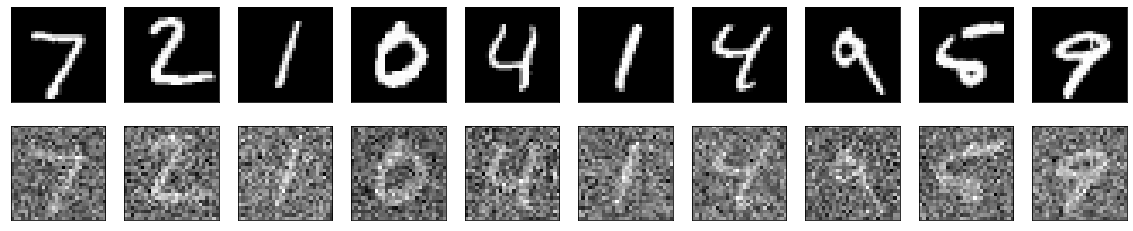

In [ ]:
# visiualise original images and corrupted noisy images
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Model Architecture and class declarations**

### **Encoder Component**

In [ ]:
# Declare Encoder class with two methods: __init and call
class Encoder(K.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
         # add hidden layer as a Dense layer with relu activition
        self.hidden_layer = K.layers.Dense(units=hidden_dim, activation=tf.nn.relu)
        
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation

### **Decoder Component**

In [ ]:
# Declare Decoder class with two methods: __init and call
class Decoder(K.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
         # add hidden layer as a Dense layer with relu activition
        self.output_layer = K.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation 

### **Denoising Autoencoder Model**

In [ ]:
# Define Autoencoder class that combines Encoder and Decoder
class Autoencoder(K.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim=original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

# **Create and train Autoencoder model**

In [ ]:
# instantiate model as Autoencoder instance
model = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)
# compile model by configuring loss and optimiser
model.compile(loss='mse', optimizer='adam')
# train model on the noisy dataset for a given number of epochs (iterations on the dataset)
loss = model.fit(x_train_noisy, # input dataset
                x_train, # original dataset (labels)
                # validation data
                validation_data=(x_test_noisy, x_test),
                # number of epochs/iterations
                epochs=max_epochs,
                #  number of samples per gradient update
                batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0507 - val_loss: 0.0335
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0303 - val_loss: 0.0275
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0260 - val_loss: 0.0254
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0251 - val_loss: 0.0247
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0247 - val_loss: 0.0242
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0245 - val_loss: 0.0242
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0245 - val_lo

### **Visualise Learning curve**

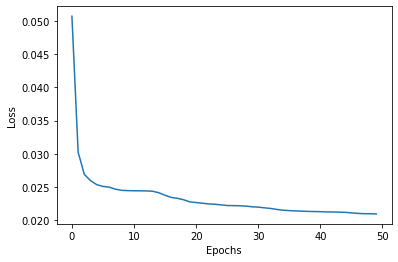

In [ ]:
# visualise loss against epochs
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# **Model Testing**

### **Visualise reconstructed images**


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



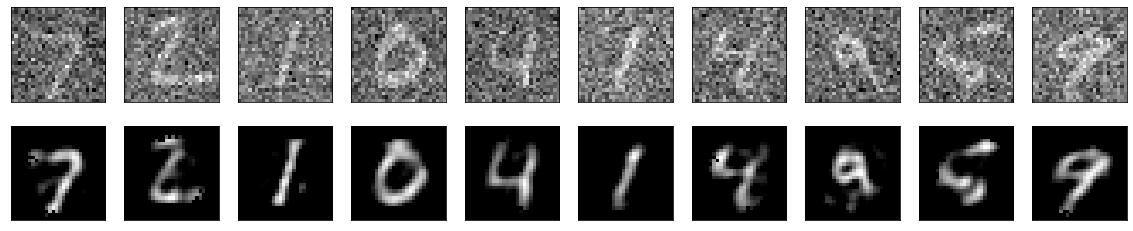

In [ ]:
# visiualise original noisy images and reconstructed denoised output
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original noisy
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Improving Output

### Increase number of hidden usints

In [ ]:
hidden_dim = 2000
# instantiate model as Autoencoder instance
model2 = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)
# compile model by configuring loss and optimiser
model2.compile(loss='mse', optimizer='adam')
# train model on the noisy dataset for a given number of epochs (iterations on the dataset)
loss = model2.fit(x_train_noisy, # input dataset
                x_train, # original dataset (labels)
                # validation data
                validation_data=(x_test_noisy, x_test),
                # number of epochs/iterations
                epochs=max_epochs,
                #  number of samples per gradient update
                batch_size=batch_size)



Epoch 1/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0512 - val_loss: 0.0405
Epoch 2/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0386 - val_loss: 0.0369
Epoch 3/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0359 - val_loss: 0.0357
Epoch 4/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0348 - val_loss: 0.0344
Epoch 5/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0336 - val_loss: 0.0338
Epoch 6/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0330 - val_loss: 0.0334
Epoch 7/50
235/235 [==============================] - 21s 91ms/step - loss: 0.0316 - val_loss: 0.0316
Epoch 8/50
235/235 [==============================] - 24s 104ms/step - loss: 0.0307 - val_loss: 0.0313
Epoch 9/50
235/235 [==============================] - 21s 90ms/step - loss: 0.0299 - val_loss: 0.0301
Epoch 10/50
235/235 [==============================] - 21s 90ms/step - loss: 0.02

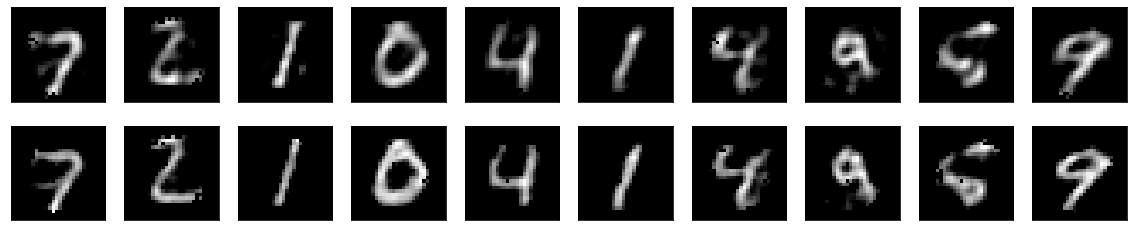

In [ ]:
# visiualise original noisy images and reconstructed denoised output
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number )
    plt.imshow(model2(x_test_noisy)[index].numpy().reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()